<a href="https://colab.research.google.com/github/victorncg/financas_quantitativas/blob/main/CRIA%C3%87%C3%83O_DE_FUN%C3%87%C3%83O_PARA_EXTRA%C3%87%C3%83O_DE_TODOS_OS_FUNDOS_v_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://github.com/Trading-com-Dados/pmf/blob/main/logotipo-trading-com-dados.svg?raw=true" width = "300">

# **Como extrair dados de cotas de fundos sem baixar nenhum arquivo**

## 1. Importação das bibliotecas

Para esta tarefa, vamos precisar apenas da biblioteca pandas

In [15]:
import pandas as pd

## 3. Realizando a extração dos dados

Criação de função para determinar a lista com períodos entre início e fim

In [8]:
def create_interval(start, end):

  b = list()

  for year in range(int(start[0:4]), int(end[0:4])+1):

    for month in range(1,13):

      a = '{:02d}{:02d}'.format(year, month)

      if a == end:
        break

      b.append(a)

    if a == end:
        break

    year = year +1

  return b

In [18]:
lista = create_interval('202201', '202203')

In [2]:
def busca_informe_simples_cvm(ano, mes):
  url = 'http://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_{:02d}{:02d}.zip'.format(ano, mes)
  return pd.read_csv(url, sep=';', compression='zip')

Execução

In [22]:
def extract_fund_data(dates_list):

  import time

  import pandas as pd

  import datetime

  start_time = time.time()

  # Initialize an empty list to store individual DataFrames
  dataframes = []

  # Iterate through the files in the folder
  for i in dates_list:

    url_pre = f'https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_{i}.zip'

    df_loc = pd.read_csv(url_pre, sep=';', compression='zip')

    s = datetime.datetime.strptime(i, "%Y%m")

    date = s.strftime('%B %Y')

    print("Extraction of month",date,"finished")

    # Append the DataFrame to the list
    dataframes.append(df_loc)

  # Combine all DataFrames in the list into one large DataFrame
  combined_df = pd.concat(dataframes, ignore_index=True)

  print("Process took %s seconds" % (time.time() - start_time))

  return combined_df

In [23]:
extract_fund_data(lista)

Extraction of month January 2022 finished
Extraction of month February 2022 finished
Process took 5.720641613006592 seconds


,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
0,FI,00.017.024/0001-53,2022-01-03,1075476.00,28.110273,1078462.74,0.0,0.00,1
1,FI,00.017.024/0001-53,2022-01-04,1075873.10,28.118682,1078785.36,0.0,0.00,1
2,FI,00.017.024/0001-53,2022-01-05,1076280.19,28.127768,1079133.95,0.0,0.00,1
3,FI,00.017.024/0001-53,2022-01-06,1076680.92,28.137115,1079492.53,0.0,0.00,1
4,FI,00.017.024/0001-53,2022-01-07,1073899.79,28.146295,1076721.79,0.0,3122.94,1
...,...,...,...,...,...,...,...,...,...
918292,FI,97.929.213/0001-34,2022-02-21,71068851.28,9.350865,71060227.06,0.0,0.00,2
918293,FI,97.929.213/0001-34,2022-02-22,71123077.75,9.357950,71114066.69,0.0,0.00,2
918294,FI,97.929.213/0001-34,2022-02-23,71199491.30,9.367954,71190093.12,0.0,0.00,2
918295,FI,97.929.213/0001-34,2022-02-24,71230906.84,9.372037,71221121.41,0.0,0.00,2


## Filtrando um fundo específico

In [57]:
fundo = combined_df[combined_df['CNPJ_FUNDO']=='42.592.302/0001-46']

In [58]:
fundo.shape

(111, 9)

In [59]:
fundo.index = fundo.DT_COMPTC

In [60]:
fundo.index = pd.to_datetime(fundo.index)

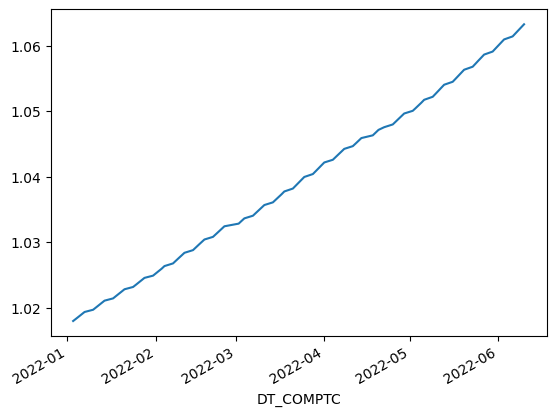

In [61]:
fundo.VL_QUOTA.plot();

## Calculando a média das variáveis para os fundos

In [47]:
medias_fundos = combined_df.groupby(by='CNPJ_FUNDO', axis = 0).mean()

<ipython-input-47-a4e4ae70c6c0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medias_fundos = combined_df.groupby(by='CNPJ_FUNDO', axis = 0).mean()


Ordendando por patrimônio líquido para encontrar os 10 maiores

In [51]:
medias_fundos.sort_values('VL_PATRIM_LIQ', ascending = False).head(10)

,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
CNPJ_FUNDO,,,,,,
07.593.972/0001-86,1.415207e+11,5.409349,1.415205e+11,5.019939e+08,4.720940e+08,290.847985
46.133.770/0001-03,1.261913e+11,110.339495,1.261905e+11,2.830644e+09,2.543103e+09,1.000000
42.592.315/0001-15,1.146619e+11,1.122379,1.146604e+11,2.688451e+09,2.288651e+09,29714.637363
00.822.055/0001-87,1.027470e+11,48.897018,1.027460e+11,5.600910e+07,5.981409e+07,1.001832
27.146.328/0001-77,9.968775e+10,1.453948,9.968703e+10,2.671138e+09,2.775336e+09,10.554945
01.597.187/0001-15,9.768394e+10,298.636041,9.769317e+10,8.216319e+08,8.621388e+08,47.543956
01.608.573/0001-65,9.615857e+10,17.818203,9.615206e+10,2.155706e+09,2.415963e+09,36.990842
42.592.302/0001-46,6.604199e+10,1.039479,6.604217e+10,2.058049e+09,2.240862e+09,1.009009
10.583.909/0001-73,5.860690e+10,3.463509,5.861018e+10,7.932518e+07,2.215670e+07,72.823853


Vamos explorar algum outro fundo

Exemplo: SICREDI - FUNDO DE INVESTIMENTO EM AÇÕES PETROBRAS

CNPJ: 08.336.054/0001-34

https://www.sicredi.com.br/site/investimentos/fundos-investimentos/fi-acoes-petrobras/

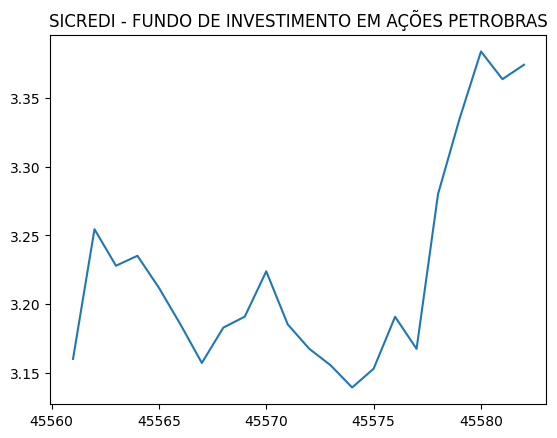

In [ ]:
fundo = dados[dados['CNPJ_FUNDO'] == '08.336.054/0001-34']

fundo.VL_QUOTA.plot(title = 'SICREDI - FUNDO DE INVESTIMENTO EM AÇÕES PETROBRAS');